#**Laboratorio 9: Diagonalización - Melanie Andrea Muñoz Chavarria**



Se sabe que un sistema físico es gobernado por las ecuaciones,

\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z,\\
z' &=& 2x&+y&+3z,\\
\end{matrix}

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\vec{r}'=A \vec{r}$ que tiene solución analítica general, $\vec{r} = e^{At} \vec{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\vec{r}(0)=(1,1,2))$

d)Compare el resultado a la solución analítica,

\begin{align}
2x &= x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y &= x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z &= x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t}))
\end{align}


In [27]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

Entonces se presenta el siguiente sistema matricial:
\begin{aligned}
\begin{bmatrix}
x' \\ y' \\ z'
\end{bmatrix}
&=
\begin{bmatrix}
2 & -1 & 1 \\
0 & 3 & -1 \\
2 & 1 & 3
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
\end{aligned}


##**Diagonalización A**

In [28]:
#Construyendo la diagonalización de A
A=np.matrix([[2,-1,1],
             [0,3,-1],
             [2,1,3]])

#Calculando los autovalores y autovectores
eigvals=np.round(np.linalg.eig(A)[0])
eigvects=np.array(np.round(np.linalg.eig(A)[1]))

eigvals

array([4.+0.j, 2.+0.j, 2.-0.j])

La matriz presenta un valor propio de multiplicidad 2, en este caso $\lambda=2$. Entonces la diagoalización no es posible y toca recurrir  aun matriz de Jordan para intentar diagonalizarla.

Para ello, primero se cálcula un vector generalizado.
$(A-2I)\vec{v_2}=\vec{v_1}$
Donde $v_1$ es el vector asociado al valor $\lambda=2$.

In [29]:
#Vector generalizado
x=sy.Symbol('x')
y=sy.Symbol('y')
z=sy.Symbol('z')
C=sy.Matrix(A)-2*sy.eye(3)
v_2=sy.Matrix([x,y,z])
v_1=sy.Matrix(eigvects[:,1])

solucion=sy.solve(C*v_2-v_1,[x,y,z])
solucion

{x: -z, y: z + 1.0}

Un vector que cumple las condiciones anteriores es $\vec{v_2}=(0,1,0)$. Entonces calculando las matrices para producir $A$:

In [30]:
#Matriz de jordan
J=np.matrix([[eigvals[0],0,0],
             [0,eigvals[1],1],
             [0,0,eigvals[2]]])
J

matrix([[4.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 2.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 2.-0.j]])

In [31]:
#Matrices laterales
v2=np.array([0,1,0])

#Tiene los vectores propios y el vector generalizado, ubicado en las columnas
P=np.matrix([eigvects[:,0],eigvects[:,1],v2]).T

P_inversa=np.linalg.inv(P)

In [32]:
#Ahora A se puede escribir como
sy.Matrix(P@J@P_inversa)

Matrix([
[2.0, -1.0,  1.0],
[  0,  3.0, -1.0],
[2.0,  1.0,  3.0]])

##**$x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$**
Donde $x(t),y(t),z(t)$, son las componentes por columnas del vector $\vec{sol}$

In [33]:
#Defiendo la solución con la exponencial

#PVI
x0=sy.Symbol('x_0')
y0=sy.Symbol('y_0')
z0=sy.Symbol('z_0')

#Vector de PVI
c=sy.Matrix([x0,y0,z0])

#e^Jt
t=sy.Symbol('t')
f_J=sy.Matrix([[sy.exp(eigvals[0]*t),0,0],
               [0,sy.exp(eigvals[1]*t),t*sy.exp(eigvals[1]*t)],
               [0,0,sy.exp(eigvals[2]*t)]])

#Matrices
P_=sy.Matrix(P)
P_inversa_=sy.Matrix(P_inversa)

#Solcuión para todo tiempo t
sol=P_@f_J@P_inversa_@c
sol

Matrix([
[                -1.0*t*y_0*exp(2.0*t) + x_0*(-1.0*t*exp(2.0*t) + 0.5*exp(2.0*t) + 0.5*exp(4.0*t)) + z_0*(-0.5*exp(2.0*t) + 0.5*exp(4.0*t))],
[x_0*(1.0*t*exp(2.0*t) + 0.5*exp(2.0*t) - 0.5*exp(4.0*t)) + y_0*(1.0*t*exp(2.0*t) + 1.0*exp(2.0*t)) + z_0*(0.5*exp(2.0*t) - 0.5*exp(4.0*t))],
[                   1.0*t*y_0*exp(2.0*t) + x_0*(1.0*t*exp(2.0*t) - 0.5*exp(2.0*t) + 0.5*exp(4.0*t)) + z_0*(0.5*exp(2.0*t) + 0.5*exp(4.0*t))]])

##**Grafique $x(t),y(t),z(t)$ (use la condición inicial $\vec{r}(0)=(1,1,2))$**

In [34]:
#Vector de PVI
r=sy.Matrix([1,1,2])

#e^Jt
t=sy.Symbol('t')
f_J=sy.Matrix([[sy.exp(eigvals[0]*t),0,0],
               [0,sy.exp(eigvals[1]*t),t*sy.exp(eigvals[1]*t)],
               [0,0,sy.exp(eigvals[2]*t)]])

#Matrices
P_=sy.Matrix(P)
P_inversa_=sy.Matrix(P_inversa)

#Solcuión para todo tiempo t
sol=P_@f_J@P_inversa_@r
sol

Matrix([
[-2.0*t*exp(2.0*t) - 0.5*exp(2.0*t) + 1.5*exp(4.0*t)],
[ 2.0*t*exp(2.0*t) + 2.5*exp(2.0*t) - 1.5*exp(4.0*t)],
[ 2.0*t*exp(2.0*t) + 0.5*exp(2.0*t) + 1.5*exp(4.0*t)]])

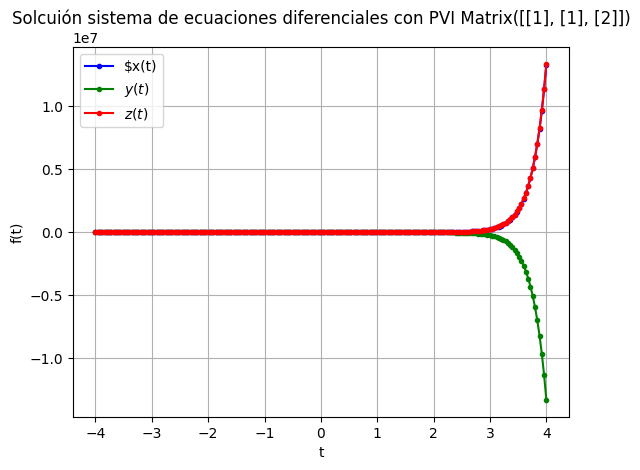

In [35]:
#Escribiendo las ecuaciones

x=lambda t: -2*t*np.exp(2*t)-(0.5)*np.exp(2*t)+(1.5)*np.exp(4*t)
y=lambda t: 2*t*np.exp(2*t)+(2.5)*np.exp(2*t)-(1.5)*np.exp(4*t)
z=lambda t: 2*t*np.exp(2*t)+(0.5)*np.exp(2*t)+(1.5)*np.exp(4*t)

t=np.linspace(-4,4,200)
plt.figure()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title(f'Solcuión sistema de ecuaciones diferenciales con PVI {r}')
plt.plot(t,x(t),'-b.',label='$x(t)')
plt.plot(t,y(t),'-g.',label='$y(t)$')
plt.plot(t,z(t),'-r.',label='$z(t)$')
plt.grid()
plt.legend()